In [27]:
from gwpy.segments import Segment
from gwpy.segments import SegmentList
from gwpy.segments import DataQualityDict
from gwpy.segments import DataQualityFlag

from gwpy.timeseries import TimeSeries

import datetime
from gwpy.time import tconvert
from gwpy.time import from_gps
from gwpy.time import to_gps

import matplotlib.pyplot as plt
from gwpy.table import Table
from gwpy.plot import Plot

import numpy
import numpy as np
import pandas as pd

from IPython.display import display
%matplotlib inline

In [ ]:
            brokelock = False
            brlock = "No"
        if tmaxv >= (te - 5*60):
            brokelock = True
            if maxv/medv > 2.5:
                brlock = "Yes"
            else:
                brlock = "No"

TimeSeries([161.62387, 161.44608, 161.28287, ..., 219.63509,
            219.37924, 219.15823]
           unit: ct,
           t0: 1267747218.0 s,
           dt: 0.0625 s,
           name: L1:ISI-GND_STS_CS_Z_EQ_PEAK_OUTMON,
           channel: L1:ISI-GND_STS_CS_Z_EQ_PEAK_OUTMON)


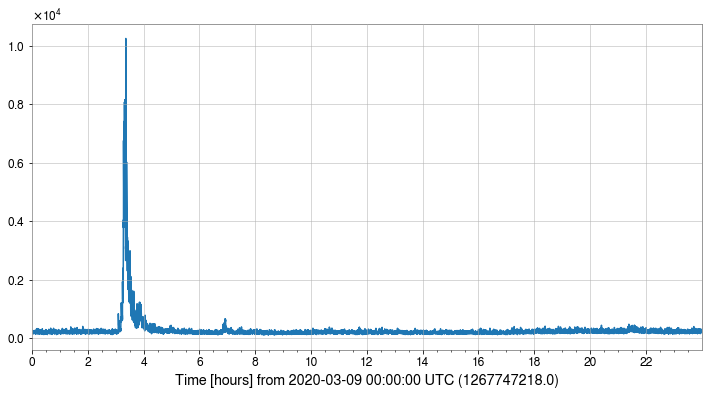

In [2]:
data = TimeSeries.read('eqlock_output.hdf')
print(data)
Plot(data)

In [3]:
gpss = data.t0
gpse = gpss + data.dt * np.size(data.value)

gpse

<Quantity 1.26783362e+09 s>

In [4]:
# find segments when detector is ready
seglist = DataQualityFlag.query('L1:DMT-GRD_ISC_LOCK_NOMINAL:1',gpss, gpse).active
seglist

<SegmentList([Segment(1267747218, 1267758959.0)
              Segment(1267766009.0, 1267774194.0)
              Segment(1267779131.0, 1267833618)])>

In [52]:
daydata = []
brokelock = None
for i in range(np.int(np.floor(np.size(seglist)/2))):
    ixs = np.int(np.floor((np.float(seglist[i].start) - np.float(to_gps(data.t0)))/0.0625)) #np.float(data.dt)
    ixe = np.int(np.ceil((np.float(seglist[i].end) - np.float(to_gps(data.t0)))/0.0625))
    ts = np.int(seglist[i].start)
    te = np.int(seglist[i].end)
    maxv = np.max(data.value[ixs:ixe])
    imaxv = numpy.argmax(data.value[ixs:ixe])                # find the index of the largest element
    tmaxv = np.int(data.times.value[ixs:ixe][imaxv])       # find the value of that element in the relevant data.times array 
    medv = np.median(data.value[ixs:ixe])
    lastv = data.value[ixe-2]
    
    if tmaxv < (te - 60):
        brokelock = False
        brlock = "No"
    if tmaxv >= (te - 60):
        brokelock = True
        brlock = "Yes"
    
    daydata.append([ts, te, tmaxv, maxv, medv, lastv, brlock])
    print(ixs, ixe)

0 187856
300656 431616
510608 1382400


In [53]:
df = pd.DataFrame(daydata, columns = ['Segment Start Time', 'Segment End Time', 'Time of Max Velocity', 'Max Velocity', 'Median Velocity', 'Last Velocity', 'Broke Lock'])
df

,Segment Start Time,Segment End Time,Time of Max Velocity,Max Velocity,Median Velocity,Last Velocity,Broke Lock
0,1267747218,1267758959,1267758958,2056.489502,201.194885,2056.320312,Yes
1,1267766009,1267774194,1267772131,658.411011,194.094070,185.207458,No
2,1267779131,1267833618,1267824229,472.589111,198.965454,219.379242,No


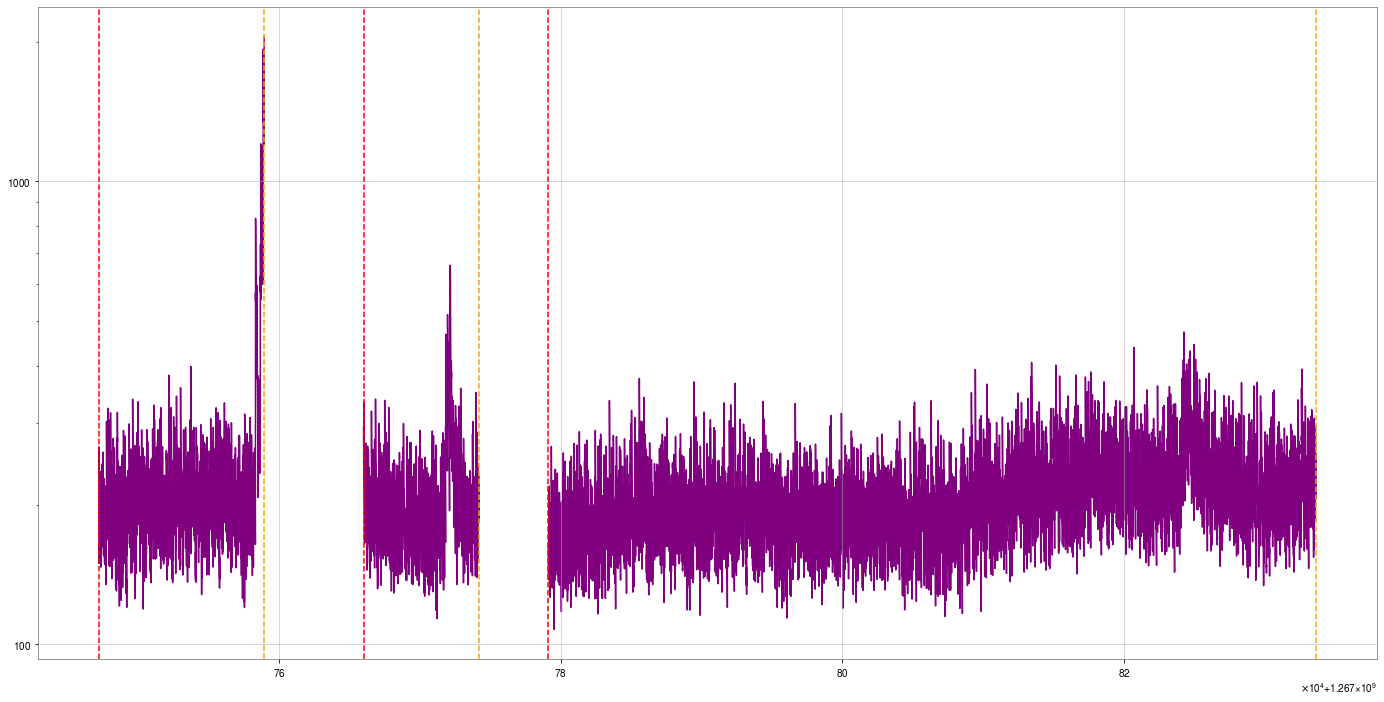

In [32]:
plt.figure(figsize=(24,12))
for i in range(np.int(np.floor(np.size(seglist)/2))):
    ixs = np.int(np.floor((np.float(seglist[i].start) - np.float(to_gps(data.t0)))/0.0625)) #np.float(data.dt)
    ixe = np.int(np.ceil((np.float(seglist[i].end) - np.float(to_gps(data.t0)))/0.0625))
    ts = seglist[i].start
    te = seglist[i].end
    ax = plt.gca()
    ax.plot(data[ixs:ixe], color='purple')
    ax.axvline(ts, color='red', linestyle='--')
    ax.axvline(te, color='orange', linestyle='--')
    ax.set_yscale('log')

plt.show()